### **Challenge: Time Series Data with Weather Conditions**

You are given a time series dataset that tracks the daily temperature, rainfall, and pollution levels over a year. Your task is to analyze this data to identify trends and make calculations for a specific crop's optimal growing conditions.

**Steps:**

1. **Data Generation**: Create a time series dataset for 365 days with columns:
    - `Date`: Daily dates for a full year.
    - `Temperature`: Random daily temperatures between -5°C and 40°C.
    - `Rainfall`: Random daily rainfall values between 0 mm and 120 mm.
    - `Pollution_Level`: Random daily pollution levels between 10 and 100.

2. **Calculate Rolling Averages**:
    - Compute a **7-day rolling average** for temperature and rainfall.
    - Create a new column called `7-Day_Avg_Pollution` for the 7-day rolling average of pollution levels.

3. **Find Optimal Growing Period**:
    - Filter the dataset for periods where:
      - The **7-day average temperature** is between 15°C and 30°C.
      - The **7-day average rainfall** is greater than 50 mm.
      - The **7-day average pollution level** is below 30.

4. **Visualize**:
    - Create a plot showing daily temperature, rainfall, and pollution level.
    - Highlight the periods that meet the optimal growing conditions.

**Bonus**:
   - Identify the **longest continuous period** (days) where the growing conditions were optimal.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Generate date range for a full year
dates = pd.date_range(start="2023-01-01", periods=365, freq="D")

# Randomly generate temperature, rainfall, and pollution levels for each day
np.random.seed(42)  # For reproducibility
temperature = np.random.uniform(low=-5, high=40, size=365)  # Temperature between -5°C and 40°C
rainfall = np.random.uniform(low=0, high=120, size=365)     # Rainfall between 0 mm and 120 mm
pollution_level = np.random.uniform(low=10, high=100, size=365)  # Pollution level between 10 and 100

# Create dictionary dataset
data = {
    'Date': dates,
    'Temperature': temperature,
    'Rainfall': rainfall,
    'Pollution_Level': pollution_level
}

# Display the first few rows (optional)
df = pd.DataFrame(data)
df.head()

,Date,Temperature,Rainfall,Pollution_Level
0,2023-01-01,11.854305,46.332317,24.783922
1,2023-01-02,37.782144,115.342868,83.311725
2,2023-01-03,27.939727,108.642077,69.867750
3,2023-01-04,21.939632,23.494936,57.075888
4,2023-01-05,2.020839,8.323356,42.294744


In [3]:
# Function to calculate rolling average for a given column over a specified window (default is 7 days)
def rolling_average(column, window=7):
    # Create a new column name by concatenating the window size and original column name
    new_column = str(window) + "_Day_Avg_" + column
    
    # Calculate the rolling average for the given column using the specified window size
    df[new_column] = df[column].rolling(window=window).mean()
    
    # Return the updated DataFrame with the new rolling average column
    return df

# Calculate the 7-day rolling average for Temperature and add it to the DataFrame
df = rolling_average("Temperature")

# Calculate the 7-day rolling average for Pollution_Level and add it to the DataFrame
df = rolling_average("Pollution_Level")

# Calculate the 7-day rolling average for Rainfall and add it to the DataFrame
df = rolling_average("Rainfall")
df.head(5)

,Date,Temperature,Rainfall,Pollution_Level,7_Day_Avg_Temperature,7_Day_Avg_Pollution_Level,7_Day_Avg_Rainfall
0,2023-01-01,11.854305,46.332317,24.783922,NaN,NaN,NaN
1,2023-01-02,37.782144,115.342868,83.311725,NaN,NaN,NaN
2,2023-01-03,27.939727,108.642077,69.867750,NaN,NaN,NaN
3,2023-01-04,21.939632,23.494936,57.075888,NaN,NaN,NaN
4,2023-01-05,2.020839,8.323356,42.294744,NaN,NaN,NaN


In [4]:
# Function to filter the DataFrame based on optimal growing conditions
def filtering(df):
    # Define the optimal conditions:
    # 1. 7-Day average temperature between 15°C and 30°C (inclusive)
    # 2. 7-Day average rainfall greater than 50 mm
    # 3. 7-Day average pollution level below 30
    return ((df['7_Day_Avg_Temperature'] >= 15) & (df['7_Day_Avg_Temperature'] <= 30) & \
            (df['7_Day_Avg_Rainfall'] > 50) & (df['7_Day_Avg_Pollution_Level'] < 30))

# Apply the filtering function to get the rows where optimal conditions are met
optimal_conditions = filtering(df)
optimal_conditions.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

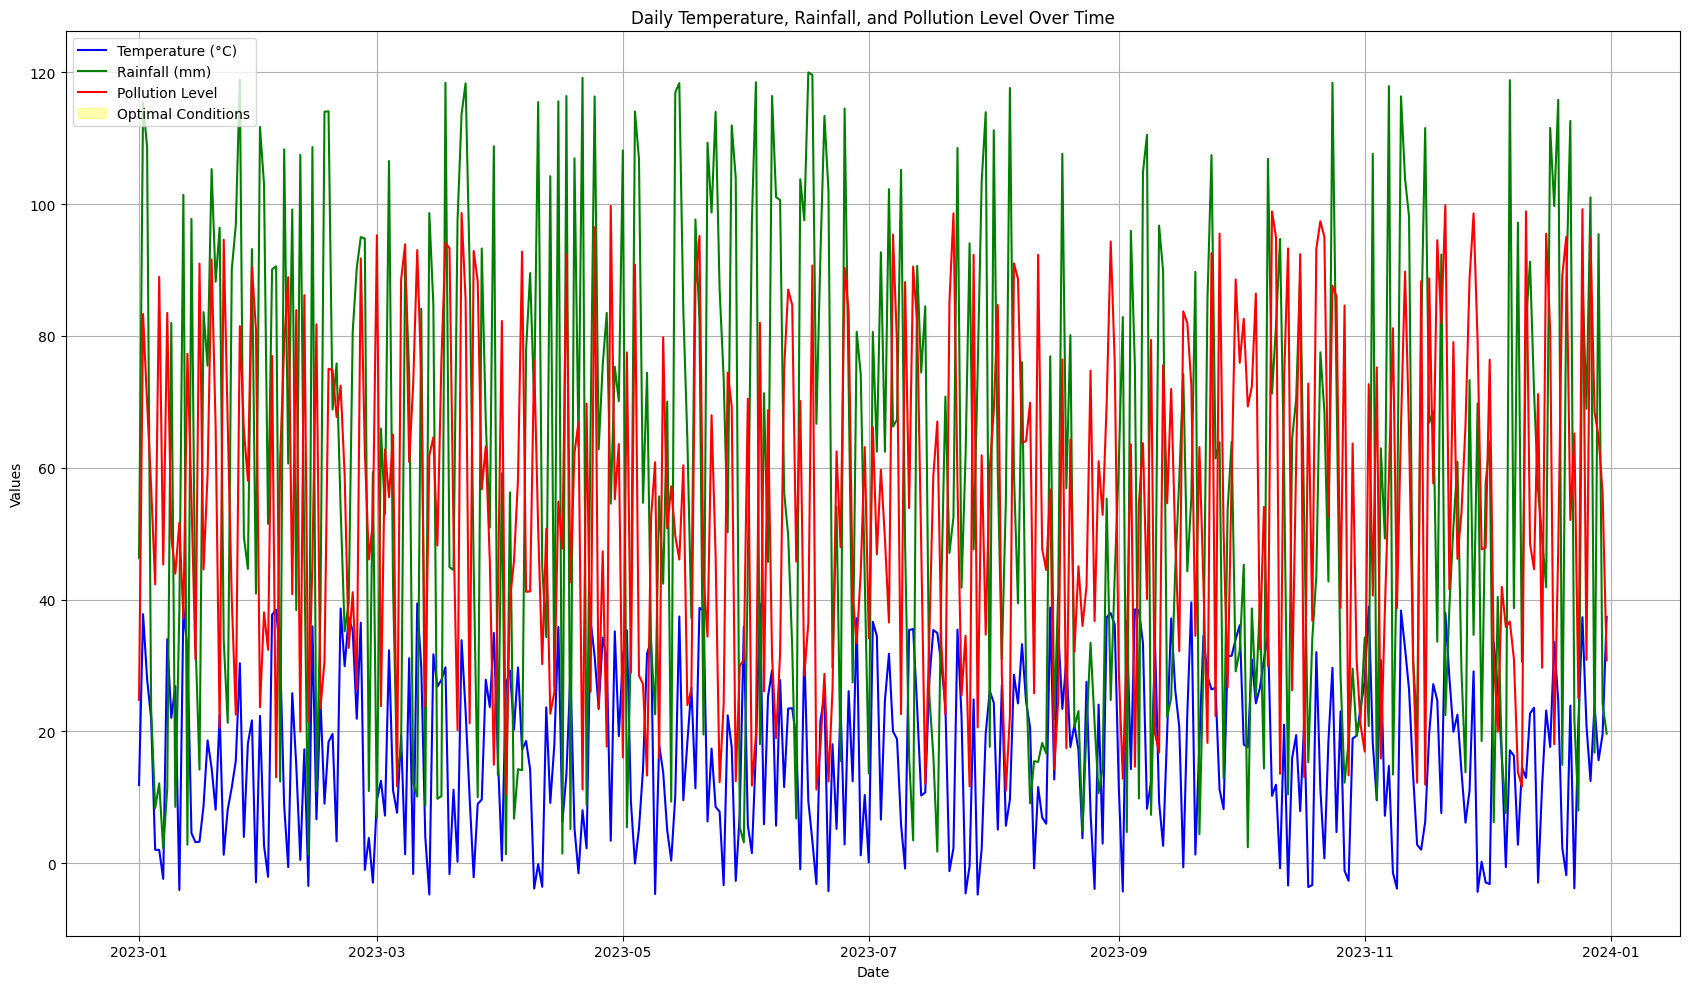

In [5]:
# Create the plot
plt.figure(figsize=(17, 10))

# Plot daily temperature, rainfall, and pollution levels
plt.plot(df['Date'], df['Temperature'], label='Temperature (°C)', color='blue')
plt.plot(df['Date'], df['Rainfall'], label='Rainfall (mm)', color='green')
plt.plot(df['Date'], df['Pollution_Level'], label='Pollution Level', color='red')

# Highlight periods that meet the optimal growing conditions
plt.fill_between(df['Date'], df['Temperature'].min(), df['Temperature'].max(), 
                  where=optimal_conditions, color='yellow', alpha=0.3, label='Optimal Conditions')

# Labels and legend
plt.title("Daily Temperature, Rainfall, and Pollution Level Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(loc="upper left")
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [9]:
# Check if there are any periods with optimal conditions
if optimal_conditions.sum() == 0:
    print("No periods with optimal growing conditions were found.")
else:
    # Use cumsum to label consecutive True values
    df['Condition_Group'] = (~optimal_conditions).cumsum()

    # Group by the condition group and calculate the length of each group
    optimal_periods = df[optimal_conditions].groupby('Condition_Group').size()

    # Identify the longest period
    longest_period = optimal_periods.max()
    longest_period_days = optimal_periods.idxmax()

    # Output the results
    print(f"The longest continuous period where growing conditions were optimal lasted {longest_period} days.")


No periods with optimal growing conditions were found.
